<a href="https://colab.research.google.com/github/AmyB-UMFlint/Final/blob/main/AB_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv ('/content/drive/MyDrive/Hollywood2019.csv')
print (df.head())
df.shape

                Film  Year          Script Type  Rotten Tomatoes Critics  \
0               Anna  2019  original screenplay                       36   
1  Avengers: Endgame  2019           adaptation                       94   
2     Black and Blue  2019  original screenplay                       51   
3   Charlie’s Angels  2019               remake                       53   
4       Dark Phoenix  2019               sequel                       23   

   Metacritic Critics  Average Critics  Rotten Tomatoes Audience  \
0                40.0             38.0                        81   
1                78.0             86.0                        90   
2                54.0             53.0                        93   
3                52.0             53.0                        79   
4                43.0             33.0                        64   

   Metacritic Audience  Rotten Tomatoes vs Metacritic Deviance  \
0                 64.0                                    17.0   
1 

(146, 31)

In [ ]:
print(df.columns)

Index(['Film', 'Year', 'Script Type', 'Rotten Tomatoes Critics',
       'Metacritic Critics', 'Average Critics', 'Rotten Tomatoes Audience',
       'Metacritic Audience', 'Rotten Tomatoes vs Metacritic Deviance',
       'Average Audience', 'Audience vs Critics Deviance', 'Primary Genre',
       'Genres', 'Opening Weekend ($)', 'Opening Weekend ($million)',
       'Domestic Gross', 'Domestic Gross ($million)',
       'Foreign Gross ($million)', 'Foreign Gross', 'Worldwide Gross',
       'Worldwide Gross ($million)', ' % of Gross earned abroad',
       'Budget ($million)', 'Budget Recovered',
       'Budget Recovered Opening Weekend', 'Oscar Winners', 'Oscar Detail',
       'Distributor', 'IMDb Rating', 'IMDB vs RT Disparity',
       'Release Date (US)'],
      dtype='object')


Text(0, 0.5, 'Worldwide Gross ($million)')

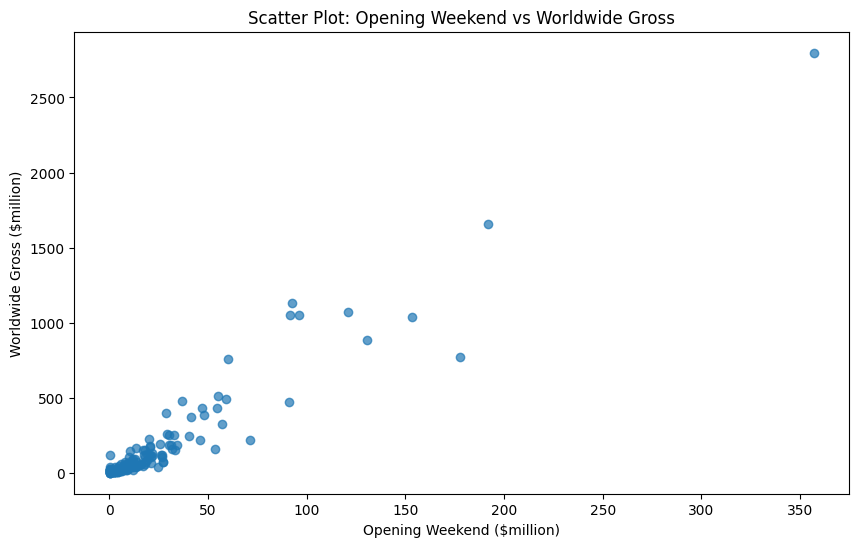

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(10, 6))
plt.scatter(df['Opening Weekend ($million)'], df['Worldwide Gross ($million)'], alpha=0.7)
plt.title('Scatter Plot: Opening Weekend vs Worldwide Gross')
plt.xlabel('Opening Weekend ($million)')
plt.ylabel('Worldwide Gross ($million)')


In [ ]:
!pip install seaborn_qqplot

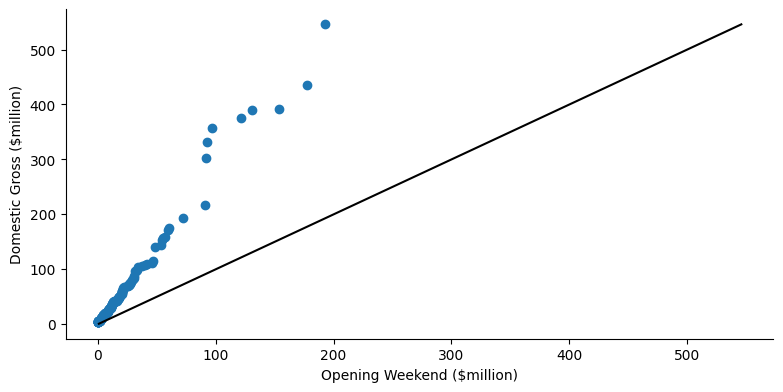

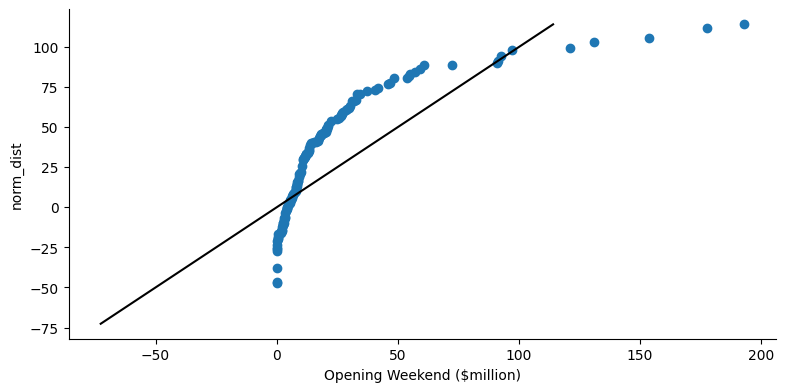

In [ ]:
from seaborn_qqplot import pplot
from scipy.stats import norm
pplot(df, x='Opening Weekend ($million)', y='Domestic Gross ($million)', kind = 'qq', display_kws={"identity":True}, height=4, aspect=2)

pplot(df, x='Opening Weekend ($million)', y=norm, kind = 'qq', display_kws={"identity":True}, height=4, aspect=2)
#this compares the norm distribution with the amount made on opening weekend

Text(0.5, 1.0, 'Amounts made in Domestic and Foreign Markets by Genre')

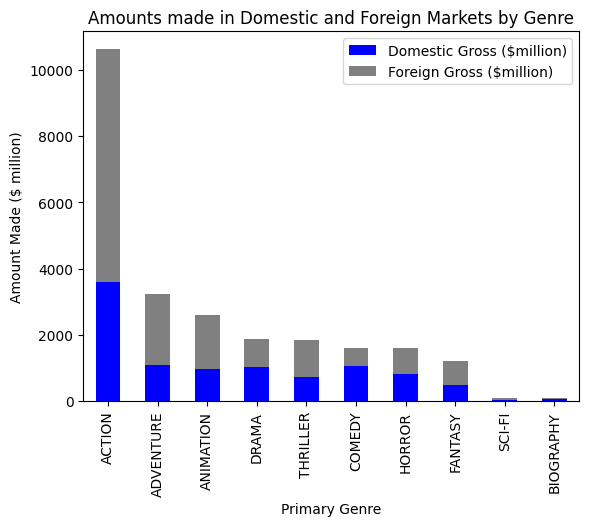

In [ ]:
# Kept getting errors with foreign gross because of rows with no data. Drop rows to clean it up
df_cleaned = df.dropna(subset=['Foreign Gross ($million)'])

# Convert 'Foreign Gross ($million)' to numeric, replacing non-numeric values with NaN
df_cleaned['Foreign Gross ($million)'] = pd.to_numeric(df_cleaned['Foreign Gross ($million)'], errors='coerce')

# Group by 'Primary Genre' and sum the amounts
grouped_data = df_cleaned.groupby('Primary Genre').sum(numeric_only=False).reset_index()

grouped_data['Total Amount'] = grouped_data['Domestic Gross ($million)'] + grouped_data['Foreign Gross ($million)']
grouped_data_sorted = grouped_data.sort_values(by='Total Amount', ascending=False)

grouped_data_sorted.plot(x='Primary Genre', y=['Domestic Gross ($million)', 'Foreign Gross ($million)'], kind='bar', stacked=True, color=['blue', 'gray'])

plt.xlabel('Primary Genre')
plt.ylabel('Amount Made ($ million)')
plt.title('Amounts made in Domestic and Foreign Markets by Genre')

In [ ]:
df_cleaned = df.dropna(subset=['Foreign Gross ($million)'])

df_cleaned['Foreign Gross ($million)'] = pd.to_numeric(df_cleaned['Foreign Gross ($million)'], errors='coerce')

grouped_data = df_cleaned.groupby('Primary Genre').sum(numeric_only=False).reset_index()

grouped_data['Total Amount'] = grouped_data['Domestic Gross ($million)'] + grouped_data['Foreign Gross ($million)']
grouped_data_sorted = grouped_data.sort_values(by='Total Amount', ascending=False)

grouped_data_sorted.plot(x='Primary Genre', y=['Domestic Gross ($million)', 'Foreign Gross ($million)'], kind='bar', stacked=True, color=['blue', 'gray'])

plt.xlabel('Primary Genre')
plt.ylabel('Amount Made ($ million)')
plt.title('Amounts made in Domestic and Foreign Markets by Genre')

I think the side by side bar chart more effectively shows the comparison between how much was made in each market so I switched to this one instead

Text(0.5, 1.0, 'Amounts made in Domestic and Foreign Markets by Genre')

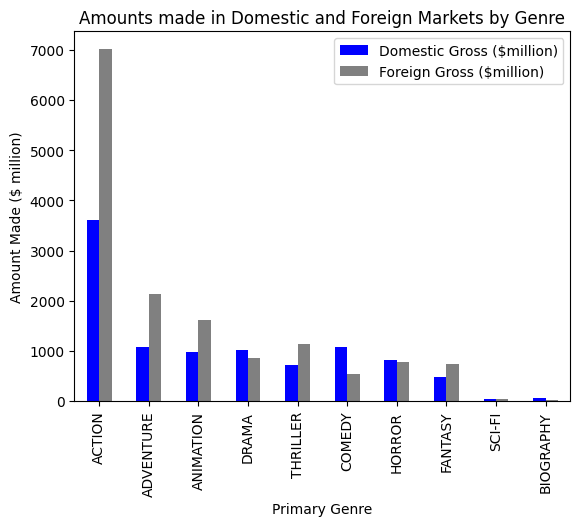

In [ ]:
df_cleaned = df.dropna(subset=['Foreign Gross ($million)'])

df_cleaned['Foreign Gross ($million)'] = pd.to_numeric(df_cleaned['Foreign Gross ($million)'], errors='coerce')

grouped_data = df_cleaned.groupby('Primary Genre').sum(numeric_only=False).reset_index()

grouped_data['Total Amount'] = grouped_data['Domestic Gross ($million)'] + grouped_data['Foreign Gross ($million)']
grouped_data_sorted = grouped_data.sort_values(by='Total Amount', ascending=False)

grouped_data_sorted.plot(x='Primary Genre', y=['Domestic Gross ($million)', 'Foreign Gross ($million)'], kind='bar', color=['blue', 'gray'])

plt.xlabel('Primary Genre')
plt.ylabel('Amount Made ($ million)')
plt.title('Amounts made in Domestic and Foreign Markets by Genre')

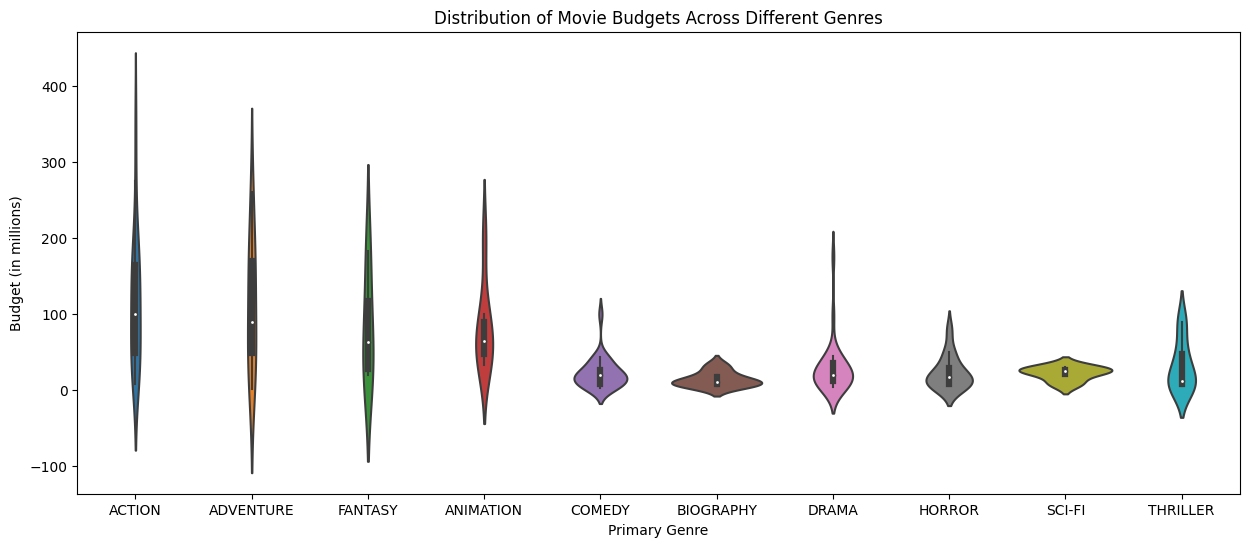

In [ ]:
df_cleaned = df.dropna(subset=['Budget ($million)'])

plt.figure(figsize=(15, 6))

sns.violinplot(x='Primary Genre', y='Budget ($million)', data=df)

plt.xlabel('Primary Genre')
plt.ylabel('Budget (in millions)')
plt.title('Distribution of Movie Budgets Across Different Genres')

plt.show()



([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'ACTION'),
  Text(1, 0, 'ADVENTURE'),
  Text(2, 0, 'FANTASY'),
  Text(3, 0, 'ANIMATION'),
  Text(4, 0, 'COMEDY'),
  Text(5, 0, 'BIOGRAPHY'),
  Text(6, 0, 'DRAMA'),
  Text(7, 0, 'HORROR'),
  Text(8, 0, 'SCI-FI'),
  Text(9, 0, 'THRILLER')])

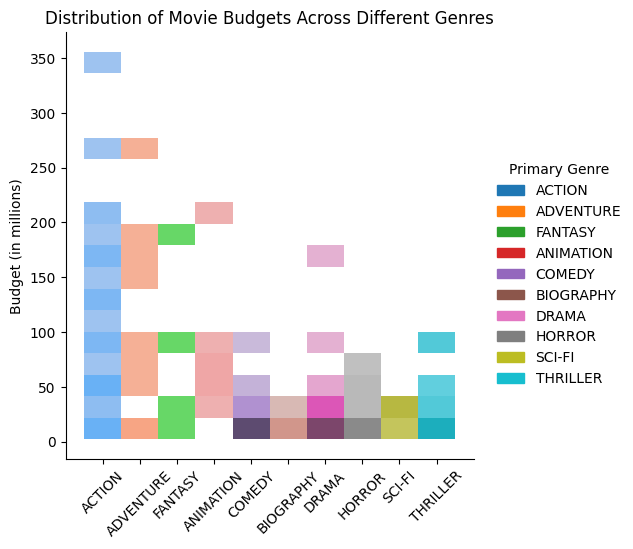

In [ ]:

sns.displot(data=df, x='Primary Genre', y='Budget ($million)', hue='Primary Genre')

plt.xlabel('')
plt.ylabel('Budget (in millions)')
plt.title('Distribution of Movie Budgets Across Different Genres')
plt.xticks(rotation=45)


Text(0, 0.5, 'Metacritic Critics')

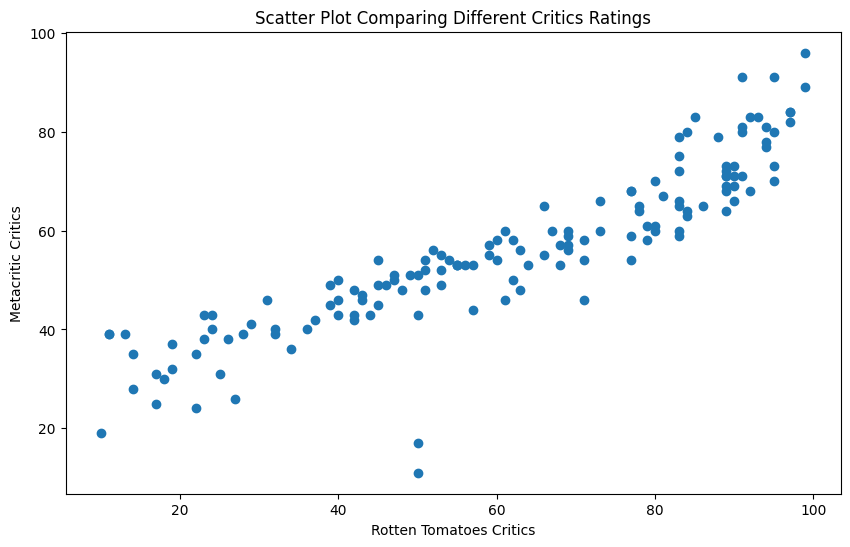

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(10, 6))
plt.scatter(df['Rotten Tomatoes Critics'], df['Metacritic Critics'])
#plt.plot(x_values, y_values, color='red', linestyle='dashed', linewidth=2)

plt.title('Scatter Plot Comparing Different Critics Ratings')
plt.xlabel('Rotten Tomatoes Critics')
plt.ylabel('Metacritic Critics')

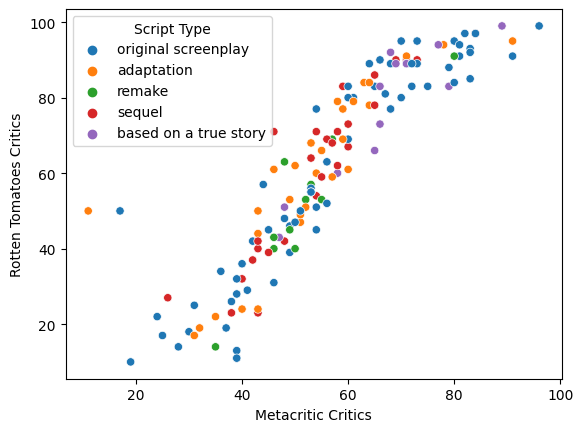

In [ ]:
import seaborn as sns
ax = sns.scatterplot(data=df, x='Metacritic Critics', y='Rotten Tomatoes Critics', hue='Script Type')

Text(0.5, 1.0, 'Comparison of Average Critic & Audience Ratings by Script Type')

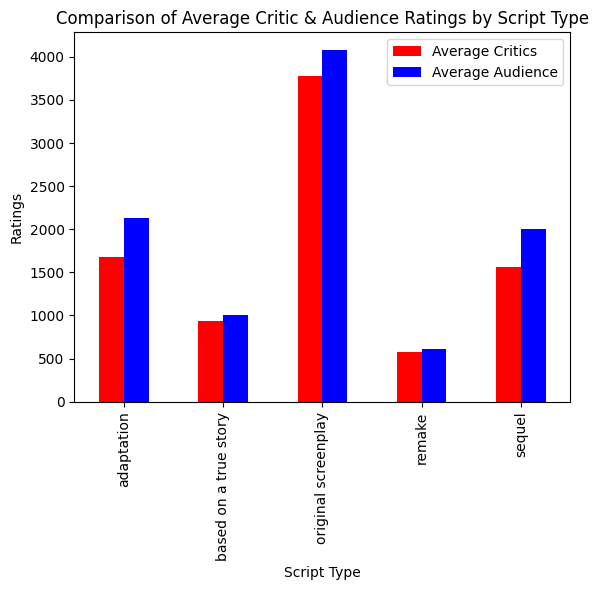

In [ ]:
grouped_scripts = df.groupby('Script Type').sum(numeric_only=False).reset_index()

grouped_scripts.plot(x='Script Type', y=['Average Critics', 'Average Audience'], kind='bar', color=['red', 'blue'])

plt.xlabel('Script Type')
plt.ylabel('Ratings')
plt.title('Comparison of Average Critic & Audience Ratings by Script Type')